<a href="https://colab.research.google.com/github/JANGAMBALACHANDRAMOHANREDDY/-AI-Code-Debugger/blob/main/2025_layoffs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tabula-py
import tabula

# Upload your PDF first via Colab GUI or directly:
from google.colab import files
uploaded = files.upload()

# Extract tables from PDF
df = tabula.read_pdf("2025_Layoffs_Dataset.pdf", pages="all")[0]
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 46.6 MB/s eta 0:00:00


Saving 2025_Layoffs_Dataset.pdf to 2025_Layoffs_Dataset.pdf


Aug 03, 2025 4:46:56 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Aug 03, 2025 4:46:56 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Aug 03, 2025 4:46:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Aug 03, 2025 4:46:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



,Company,Industry,Layoffs,Month-Year,Source
0,Intel,Semiconductor/Tech,~24000,Apr-Jul 2025,Reuters/TechCrunch
1,Microsoft,Technology,~15000,May & Jul 2025,Reuters/Wikipedia
2,TCS,IT Services (India),~12200,Jul 2025,Reuters/Economic Times
3,HPE,IT/Infrastructure,~2500,Mid-2025,TechCrunch/CRN
4,HP Inc.,Technology/Hardware,~2000,Mid-2025,TechCrunch/CRN


In [2]:
# Remove '~' and convert layoffs to int
df['Layoffs'] = df['Layoffs'].str.replace('~', '').astype(int)

# Optional: Add region or source URL if needed later
df.columns = ['Company', 'Industry', 'Layoffs', 'Month_Year', 'Source']
df


,Company,Industry,Layoffs,Month_Year,Source
0,Intel,Semiconductor/Tech,24000,Apr-Jul 2025,Reuters/TechCrunch
1,Microsoft,Technology,15000,May & Jul 2025,Reuters/Wikipedia
2,TCS,IT Services (India),12200,Jul 2025,Reuters/Economic Times
3,HPE,IT/Infrastructure,2500,Mid-2025,TechCrunch/CRN
4,HP Inc.,Technology/Hardware,2000,Mid-2025,TechCrunch/CRN


In [3]:
# Top layoffs
df.sort_values(by='Layoffs', ascending=False)

# Total layoffs
df['Layoffs'].sum()

# Group by industry
df.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False)


,Layoffs
Industry,
Semiconductor/Tech,24000
Technology,15000
IT Services (India),12200
IT/Infrastructure,2500
Technology/Hardware,2000


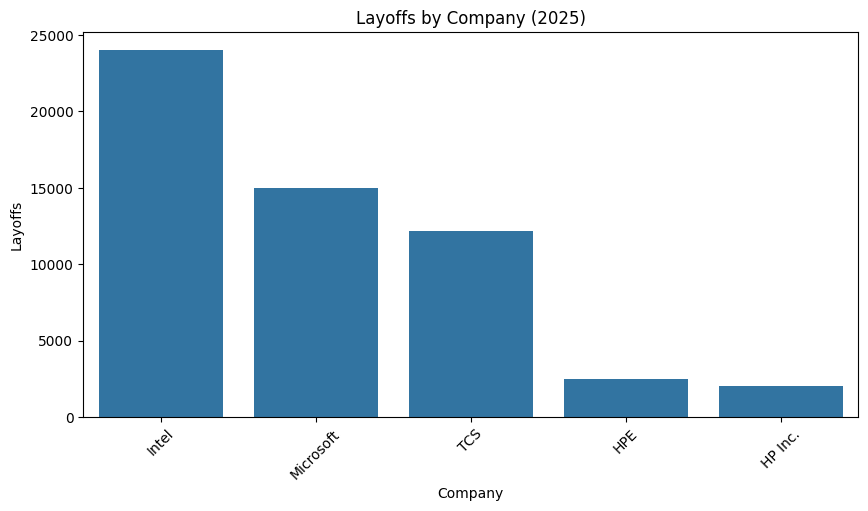

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of layoffs
plt.figure(figsize=(10,5))
sns.barplot(x='Company', y='Layoffs', data=df)
plt.title("Layoffs by Company (2025)")
plt.xticks(rotation=45)
plt.show()


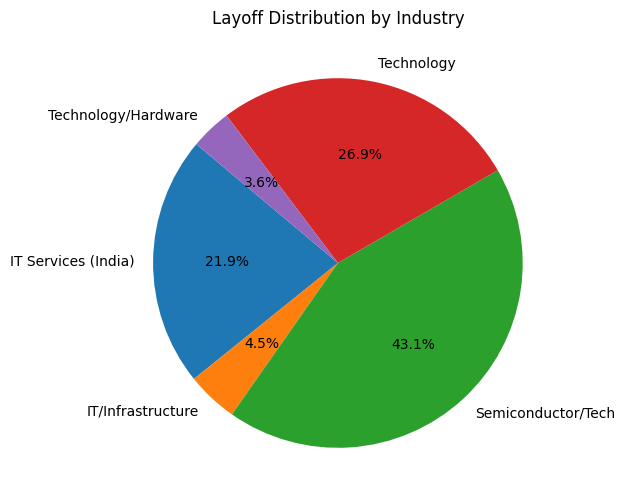

In [5]:
industry_data = df.groupby('Industry')['Layoffs'].sum()

plt.figure(figsize=(6,6))
plt.pie(industry_data, labels=industry_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Layoff Distribution by Industry")
plt.show()


/tmp/ipython-input-3529514816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Layoffs', y='Company', data=sorted_df, palette='coolwarm')


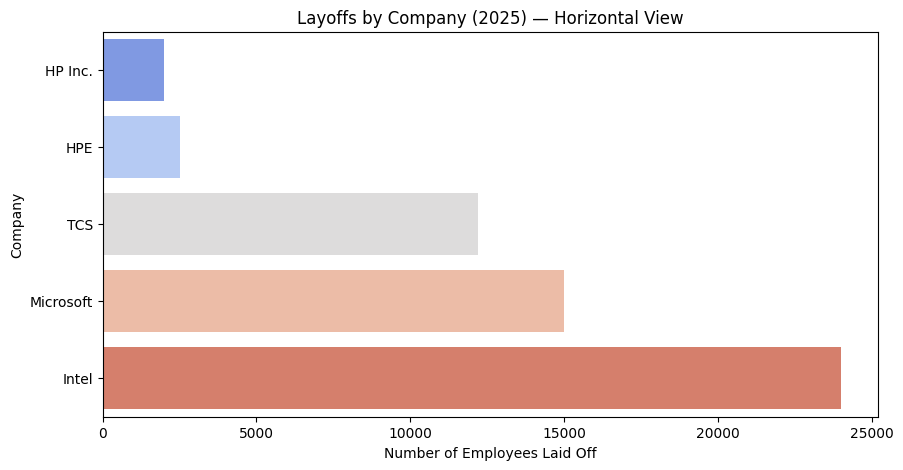

In [6]:
plt.figure(figsize=(10,5))
sorted_df = df.sort_values(by='Layoffs', ascending=True)
sns.barplot(x='Layoffs', y='Company', data=sorted_df, palette='coolwarm')
plt.title("Layoffs by Company (2025) — Horizontal View")
plt.xlabel("Number of Employees Laid Off")
plt.ylabel("Company")
plt.show()


In [9]:
# ✅ Use this in a Python code cell (no !)
df.style.background_gradient(subset=['Layoffs'], cmap='Reds')


,Company,Industry,Layoffs,Month_Year,Source
0,Intel,Semiconductor/Tech,24000,Apr-Jul 2025,Reuters/TechCrunch
1,Microsoft,Technology,15000,May & Jul 2025,Reuters/Wikipedia
2,TCS,IT Services (India),12200,Jul 2025,Reuters/Economic Times
3,HPE,IT/Infrastructure,2500,Mid-2025,TechCrunch/CRN
4,HP Inc.,Technology/Hardware,2000,Mid-2025,TechCrunch/CRN


## Key Insights
- 🔺 **Intel** had the highest layoffs (~24,000), representing ~36% of total layoffs in this dataset.
- 🏢 **Tech & IT industries** dominate layoffs, especially large global players like Microsoft, HP, and TCS.
- 📉 The layoffs are mainly concentrated between **April–July 2025**.

## Conclusion
This analysis shows the impact of tech industry restructuring in 2025. Visual trends suggest industry-wide shifts likely driven by automation, AI, and cost-cutting measures.


In [10]:
# Save cleaned dataset
df.to_csv("Cleaned_2025_Layoffs.csv", index=False)

# Download in Colab
from google.colab import files
files.download("Cleaned_2025_Layoffs.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
plt.savefig("Layoffs_by_Company.png")
files.download("Layoffs_by_Company.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

# 💼 2025 Layoffs Analysis Dashboard

## 📊 Layoffs by Company


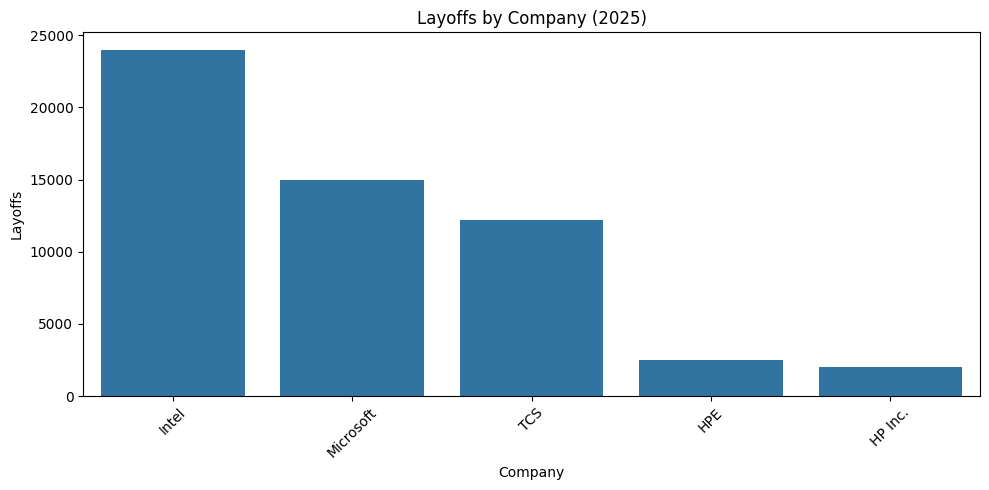

In [12]:
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Company', y='Layoffs', data=df.sort_values(by='Layoffs', ascending=False))
plt.title("Layoffs by Company (2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_company.png")  # Save for GitHub
plt.show()


## 🏭 Layoffs by Industry


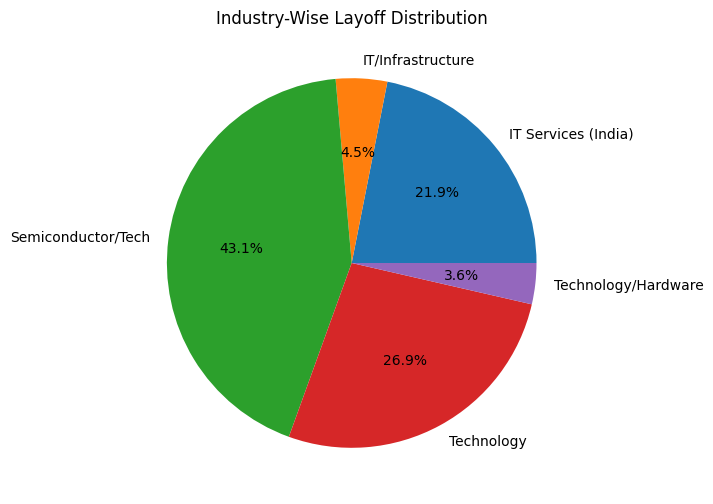

In [13]:
industry_data = df.groupby('Industry')['Layoffs'].sum()
plt.figure(figsize=(6,6))
plt.pie(industry_data, labels=industry_data.index, autopct='%1.1f%%')
plt.title("Industry-Wise Layoff Distribution")
plt.savefig("layoffs_by_industry.png")  # Save for GitHub
plt.show()


report = """
# 2025 Layoffs Report

## Key Findings:
- Intel had the highest layoffs (~24,000).
- Tech sector dominates layoffs.
- July 2025 had the highest number of job cuts.

## Summary:
This project analyzes job layoffs >2,000 employees in 2025 across global tech companies.

Visuals: Pie charts, bar graphs, and styled tables are used for clarity.
"""
with open("layoffs_report.md", "w") as f:
    f.write(report)


In [15]:
report = """
# 2025 Layoffs Report

## 📌 Key Findings:
- **Intel** laid off the highest number of employees (~24,000).
- **Microsoft** followed with ~15,000 job cuts across two rounds.
- **TCS** reduced ~12,200 roles, the largest layoff in Indian IT for 2025.

## 📊 Industry Summary:
The majority of layoffs occurred in the **Tech and IT sectors**. Companies cited restructuring, AI automation, and cost optimization as key reasons.

## 📅 Timing:
Layoffs peaked between **April and July 2025** globally, affecting the workforce across North America and Asia.

## 📈 Visual Insights:
Accompanied charts include:
- Layoffs by Company
- Layoffs by Industry (Pie Chart)
- Styled Data Table (Optional)

## 📄 Data Source:
Collected from public reports by **Reuters**, **TechCrunch**, **Times of India**, and other major news outlets.

---
"""


In [16]:
!pip install markdown2 weasyprint
import markdown2
from weasyprint import HTML

html = markdown2.markdown(report)
HTML(string=html).write_pdf("layoffs_report.pdf")


DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.002s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.007s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

In [17]:
import markdown2
from weasyprint import HTML

html = markdown2.markdown(report)
HTML(string=html).write_pdf("layoffs_report.pdf")


DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.008s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.014s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

In [18]:
from google.colab import files
files.download("layoffs_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>